In [11]:
from model import *
import seaborn as sns

In [2]:
economy = Economy(seed=1000)

In [3]:
years = 600
days = 21*12*years # 21 * 12 steps = 1 year
print(f"Running model for {days} days.")
for _ in range(days): 
    economy.step()    

Running model for 151200 days.
Today is day 1.
start of month.
Today is day 2.
Today is day 3.
Today is day 4.
Today is day 5.
Today is day 6.
Today is day 7.
Today is day 8.
Today is day 9.
Today is day 10.
Today is day 11.
Today is day 12.
Today is day 13.
Today is day 14.
Today is day 15.
Today is day 16.
Today is day 17.
Today is day 18.
Today is day 19.
Today is day 20.
Today is day 21.
Today is day 22.
start of month.
Today is day 23.
Today is day 24.
Today is day 25.
Today is day 26.
Today is day 27.
Today is day 28.
Today is day 29.
Today is day 30.
Today is day 31.
Today is day 32.
Today is day 33.
Today is day 34.
Today is day 35.
Today is day 36.
Today is day 37.
Today is day 38.
Today is day 39.
Today is day 40.
Today is day 41.
Today is day 42.
Today is day 43.
start of month.
Today is day 44.
Today is day 45.
Today is day 46.
Today is day 47.
Today is day 48.
Today is day 49.
Today is day 50.
Today is day 51.
Today is day 52.
Today is day 53.
Today is day 54.
Today is day

In [4]:
hdata = economy.datacollector.get_agenttype_vars_dataframe(agent_type=Household)

In [5]:
print(hdata)

                employment   full_demand
Step   AgentID                          
21     1                 1  10000.000000
       2                 1  10000.000000
       3                 1  10000.000000
       4                 1  10000.000000
       5                 1  10000.000000
...                    ...           ...
151200 996               1     64.417452
       997               1     63.224929
       998               1     62.688926
       999               1      0.000000
       1000              1     60.671874

[7200000 rows x 2 columns]


In [6]:
type(hdata)

pandas.core.frame.DataFrame

In [7]:
hdata_sum = hdata.groupby('Step')['employment'].sum().reset_index()
max_steps = max(hdata_sum["Step"])
years = 50
steps_count = 21*12*years
hdata_sum = hdata_sum[hdata_sum['Step'] > max_steps - steps_count].reset_index()
hdata_sum['year'] = hdata_sum.index/12

In [8]:
hdata_sum

index    Step  employment       year
0     6600  138621         953   0.000000
1     6601  138642         960   0.083333
2     6602  138663         966   0.166667
3     6603  138684         974   0.250000
4     6604  138705         981   0.333333
..     ...     ...         ...        ...
595   7195  151116         990  49.583333
596   7196  151137         991  49.666667
597   7197  151158         990  49.750000
598   7198  151179         987  49.833333
599   7199  151200         987  49.916667

[600 rows x 4 columns]

In [9]:
hdata_sum['employment']

0      953
1      960
2      966
3      974
4      981
      ... 
595    990
596    991
597    990
598    987
599    987
Name: employment, Length: 600, dtype: int64

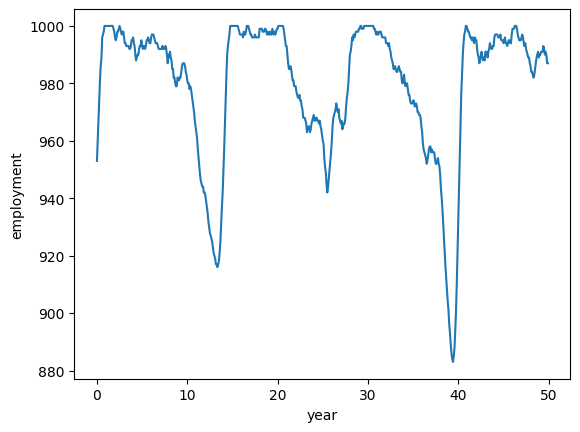

In [12]:
g = sns.lineplot(
    data=hdata_sum,
    x = 'year',
    y = 'employment'
    )

In [13]:
fdata = economy.datacollector.get_agenttype_vars_dataframe(agent_type=Firm)

In [14]:
fdata

output         price  employees  fulfilled_demand  vacancy  \
Step   AgentID                                                               
21     1001        504  1.000000e+00          8        480.000000      inf   
       1002        756  1.000000e+00         12        720.000000      inf   
       1003        378  1.000000e+00          6        360.000000      inf   
       1004        315  1.000000e+00          5        300.000000      inf   
       1005        441  1.000000e+00          7        420.000000      inf   
...                ...           ...        ...               ...      ...   
151200 1096          0  2.793282e-08          0          0.000000      0.0   
       1097          0  1.000000e-09          0          0.000000      0.0   
       1098          0  7.117993e-05          0          0.000000      0.0   
       1099          0  1.000000e-09          0          0.000000      0.0   
       1100       5040  1.571187e+02         80       4560.354347      0.0   

                  inventory          wage  
Step   AgentID                             
21     1001       24.000000  1.413968e+01  
       1002       36.000000  2.360588e+01  
       1003       18.000000  2.352245e+01  
       1004       15.000000  2.707373e+01  
       1005       21.000000  2.724415e+01  
...                     ...           ...  
151200 1096       37.059686  2.610246e-09  
       1097       38.946553  1.000000e-09  
       1098      117.157342  6.192501e-05  
       1099       29.654352  1.000000e-09  
       1100     9723.511612  9.551398e+03  

[720000 rows x 7 columns]

In [ ]:
fdata_sum = fdata.groupby('Step').sum().reset_index()
fdata_sum

Step  output      price  employees  fulfilled_demand  vacancy  \
0         21  630.00   1.000000      10.00        600.000000      inf   
1         42  630.00   1.000000      10.00        630.000000      inf   
2         63  630.00   1.000000      10.00        630.000000     1.00   
3         84  630.00   1.000000      10.00        630.000000     1.00   
4        105  630.00   1.000000      10.00        630.000000     1.00   
...      ...     ...        ...        ...               ...      ...   
7195  151116  623.70  19.897347       9.90        610.387741     0.02   
7196  151137  624.33  19.921434       9.91        608.079635     0.04   
7197  151158  623.70  19.933243       9.90        606.979863     0.01   
7198  151179  621.81  19.933243       9.87        607.106583     0.03   
7199  151200  621.81  19.961174       9.87        606.060583     0.05   

       inventory         wage  
0      30.000000    19.571111  
1      30.000000    19.763784  
2      30.000000    19.935824  
3      30.000000    20.126485  
4      30.000000    20.306029  
...          ...          ...  
7195  527.204336  1195.364186  
7196  543.454701  1198.684401  
7197  560.174838  1198.355196  
7198  574.878255  1198.329883  
7199  590.627672  1200.616472  

[7200 rows x 8 columns]

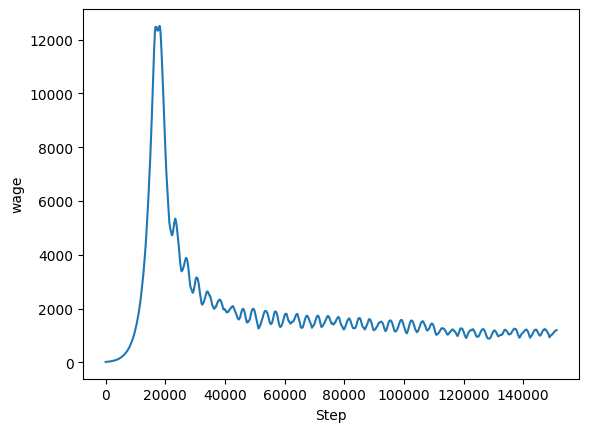

In [16]:
fdata_sum_filtered = fdata_sum[fdata_sum['Step'] > 0].reset_index()
g = sns.lineplot(
    data=fdata_sum_filtered,
    x = 'Step',
    y = 'wage'
    )

In [17]:
fdata_last = fdata.iloc[-1]
fdata_last

output              5040.000000
price                157.118746
employees             80.000000
fulfilled_demand    4560.354347
vacancy                0.000000
inventory           9723.511612
wage                9551.398213
Name: (151200, 1100), dtype: float64

In [18]:
alldata = economy.datacollector.get_agent_vars_dataframe()
alldata

money
Step   AgentID              
21     1        10011.719030
       2         9688.685719
       3         9977.792409
       4        10056.050681
       5        10052.629430
...                      ...
151200 1096         0.000000
       1097         0.000000
       1098         0.000000
       1099         0.000000
       1100         0.000000

[7920000 rows x 1 columns]

In [19]:
alldata_sum = alldata.groupby('Step').sum().reset_index()
alldata_sum['money'] = round(alldata_sum['money'], 0)
alldata_sum

Step       money
0         21  10000000.0
1         42  10000000.0
2         63  10000000.0
3         84  10000000.0
4        105  10000000.0
...      ...         ...
7195  151116  10000000.0
7196  151137  10000000.0
7197  151158  10000000.0
7198  151179  10000000.0
7199  151200  10000000.0

[7200 rows x 2 columns]

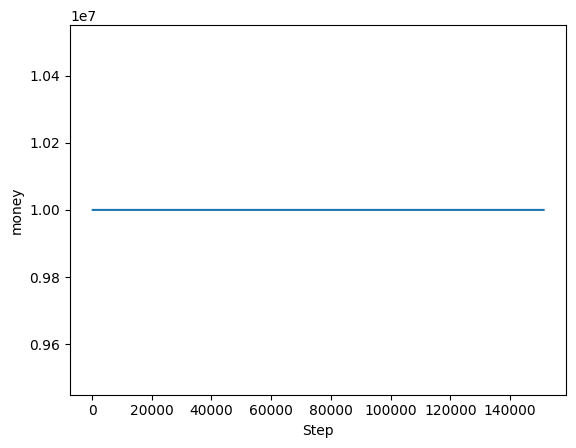

In [ ]:
alldata_sum = alldata_sum[alldata_sum['Step'] > 10*21].reset_index()
g = sns.lineplot(
    data=alldata_sum,
    x = 'Step',
    y = 'money'
    )

In [ ]:
dfs = {'hdata': hdata, 'fdata': fdata, 'alldata': alldata}

def flatten_to_csv(dfs):
    for name, df in dfs.items():
        data = df.stack().reset_index()
        cols = data.columns.to_list()
        cols[-2:] = ['variable', 'value']
        data.columns = cols
        data.to_csv(f'../output/{name}.csv', index=False)

# flatten_to_csv(dfs)